In [ ]:
#installing tweet-preprocessor
!pip install tweet-preprocessor
!pip install vaderSentiment

In [1]:
# import tweepy
import tweepy as tw
import pandas as pd
from datetime import date, timedelta
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import preprocessor as p
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import seaborn as sb
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\smara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_tweet = pd.read_csv('final.csv')
df_bitcoin = pd.read_csv('Gemini_BTCUSD_1h.csv')

In [3]:
df_tweet

,id,created_date,created_time,preprocess_tweet
0,5.508036e+17,2015-01-01,23:59:48+00:00,bitcoin my brother i lunch first websit biton ...
1,5.508034e+17,2015-01-01,23:59:04+00:00,the latest bitcoin price index usd
2,5.508034e+17,2015-01-01,23:59:01+00:00,winklevoss bitcoin trust file to sell million ...
3,5.508033e+17,2015-01-01,23:58:33+00:00,bitcoin how deal doubter
4,5.508033e+17,2015-01-01,23:58:31+00:00,bitcoin itslikethistoo ep zach harvey co found...
...,...,...,...,...
311461,1.477066e+18,2021-12-31,23:56:14+00:00,surpris tumblr twitter facebook instagram webt...
311462,1.477066e+18,2021-12-31,23:56:14+00:00,surpris bitcoin tumblr twitter facebook instag...
311463,1.477066e+18,2021-12-31,23:56:14+00:00,surpris blogger tumblr twitter facebook instag...
311464,1.477066e+18,2021-12-31,23:56:13+00:00,today market capit tether usdt stablecoin surp...


### We use the preprocessor library and then a custom function to clean and preprocess tweets

In [4]:
df_tweet['cleansed_tweet'] = [p.clean(str(i)) for i in df_tweet['preprocess_tweet']]

In [5]:
df_tweet['cleansed_tweet_lower'] = df_tweet['cleansed_tweet'].astype(str).str.replace('\d+', '').str.lower()

C:\Users\smara\AppData\Local\Temp/ipykernel_23732/2632524791.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tweet['cleansed_tweet_lower'] = df_tweet['cleansed_tweet'].astype(str).str.replace('\d+', '').str.lower()


In [6]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [7]:
df_tweet['cleansed_tweet_final'] = clean_tweets(df_tweet['cleansed_tweet_lower'])
df_tweet.head()

,id,created_date,created_time,preprocess_tweet,cleansed_tweet,cleansed_tweet_lower,cleansed_tweet_final
0,5.508036e+17,2015-01-01,23:59:48+00:00,bitcoin my brother i lunch first websit biton ...,bitcoin my brother i lunch first websit biton ...,bitcoin my brother i lunch first websit biton ...,bitcoin my brother i lunch first websit biton ...
1,5.508034e+17,2015-01-01,23:59:04+00:00,the latest bitcoin price index usd,the latest bitcoin price index usd,the latest bitcoin price index usd,the latest bitcoin price index usd
2,5.508034e+17,2015-01-01,23:59:01+00:00,winklevoss bitcoin trust file to sell million ...,winklevoss bitcoin trust file to sell million ...,winklevoss bitcoin trust file to sell million ...,winklevoss bitcoin trust file to sell million ...
3,5.508033e+17,2015-01-01,23:58:33+00:00,bitcoin how deal doubter,bitcoin how deal doubter,bitcoin how deal doubter,bitcoin how deal doubter
4,5.508033e+17,2015-01-01,23:58:31+00:00,bitcoin itslikethistoo ep zach harvey co found...,bitcoin itslikethistoo ep zach harvey co found...,bitcoin itslikethistoo ep zach harvey co found...,bitcoin itslikethistoo ep zach harvey co found...


## Using Vader to get baseline sentiment

In [8]:
df_tweet['comp_sentiment'] = [analyser.polarity_scores(i)["compound"] for i in df_tweet['cleansed_tweet_final']]

In [5]:
analyser.polarity_scores('this is not good')

{'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'compound': -0.3412}

<AxesSubplot:>

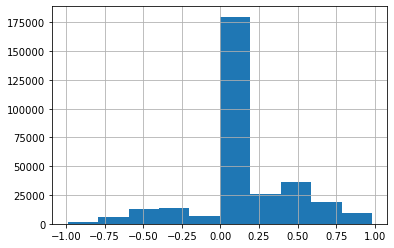

In [10]:
df_tweet.comp_sentiment.hist()

In [11]:
df_tweet['date_time'] = df_tweet['created_date'] + " " + df_tweet['created_time']

In [13]:
df_tweet

,id,created_date,created_time,preprocess_tweet,cleansed_tweet,cleansed_tweet_lower,cleansed_tweet_final,comp_sentiment,date_time
0,5.508036e+17,2015-01-01,23:59:48+00:00,bitcoin my brother i lunch first websit biton ...,bitcoin my brother i lunch first websit biton ...,bitcoin my brother i lunch first websit biton ...,bitcoin my brother i lunch first websit biton ...,0.3818,2015-01-01 23:59:48+00:00
1,5.508034e+17,2015-01-01,23:59:04+00:00,the latest bitcoin price index usd,the latest bitcoin price index usd,the latest bitcoin price index usd,the latest bitcoin price index usd,0.0000,2015-01-01 23:59:04+00:00
2,5.508034e+17,2015-01-01,23:59:01+00:00,winklevoss bitcoin trust file to sell million ...,winklevoss bitcoin trust file to sell million ...,winklevoss bitcoin trust file to sell million ...,winklevoss bitcoin trust file to sell million ...,0.6705,2015-01-01 23:59:01+00:00
3,5.508033e+17,2015-01-01,23:58:33+00:00,bitcoin how deal doubter,bitcoin how deal doubter,bitcoin how deal doubter,bitcoin how deal doubter,-0.3818,2015-01-01 23:58:33+00:00
4,5.508033e+17,2015-01-01,23:58:31+00:00,bitcoin itslikethistoo ep zach harvey co found...,bitcoin itslikethistoo ep zach harvey co found...,bitcoin itslikethistoo ep zach harvey co found...,bitcoin itslikethistoo ep zach harvey co found...,0.0000,2015-01-01 23:58:31+00:00
...,...,...,...,...,...,...,...,...,...
311461,1.477066e+18,2021-12-31,23:56:14+00:00,surpris tumblr twitter facebook instagram webt...,surpris tumblr twitter facebook instagram webt...,surpris tumblr twitter facebook instagram webt...,surpris tumblr twitter facebook instagram webt...,0.7003,2021-12-31 23:56:14+00:00
311462,1.477066e+18,2021-12-31,23:56:14+00:00,surpris bitcoin tumblr twitter facebook instag...,surpris bitcoin tumblr twitter facebook instag...,surpris bitcoin tumblr twitter facebook instag...,surpris bitcoin tumblr twitter facebook instag...,0.7579,2021-12-31 23:56:14+00:00
311463,1.477066e+18,2021-12-31,23:56:14+00:00,surpris blogger tumblr twitter facebook instag...,surpris blogger tumblr twitter facebook instag...,surpris blogger tumblr twitter facebook instag...,surpris blogger tumblr twitter facebook instag...,0.0000,2021-12-31 23:56:14+00:00
311464,1.477066e+18,2021-12-31,23:56:13+00:00,today market capit tether usdt stablecoin surp...,today market capit tether usdt stablecoin surp...,today market capit tether usdt stablecoin surp...,today market capit tether usdt stablecoin surp...,0.4019,2021-12-31 23:56:13+00:00


In [14]:
df_tweet['date_time'] = pd.to_datetime(df_tweet['date_time'],format='%Y/%m/%d %H:%M:%S')

In [15]:
df_tweet['date_day'] = df_tweet.date_time.dt.date
df_tweet['date_hour'] = df_tweet.date_time.dt.hour

In [16]:
df_tweet_sentiment_agg = df_tweet.groupby(['date_day','date_hour']).agg({'comp_sentiment':'mean'}).reset_index()

In [17]:
df_tweet_sentiment_agg['date'] = pd.to_datetime(df_tweet_sentiment_agg.date_day) + df_tweet_sentiment_agg.date_hour.astype('timedelta64[h]')

In [18]:
df_bitcoin['date'] = pd.to_datetime(df_bitcoin['date'] ,dayfirst=True)
df_bitcoin_fin = df_bitcoin[['date','close','Volume USD']]
df_bitcoin_fin['close_change'] = df_bitcoin_fin['close'].pct_change()

C:\Users\smara\AppData\Local\Temp/ipykernel_23732/2083849540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bitcoin_fin['close_change'] = df_bitcoin_fin['close'].pct_change()


In [19]:
df_bitcoin_fin = df_bitcoin_fin[1:]

In [20]:
df_analysis_correl = pd.merge(df_bitcoin_fin,df_tweet_sentiment_agg[['date','comp_sentiment']],how='inner',on='date')

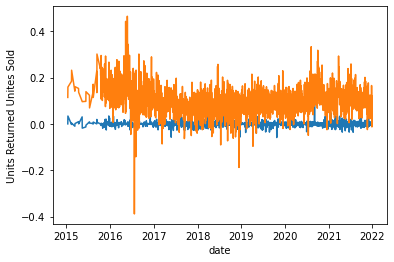

In [21]:
# time series plot for multiple columns
sb.lineplot(x="date", y="close_change", data=df_analysis_correl)
sb.lineplot(x="date", y="comp_sentiment", data=df_analysis_correl)

# set label
plt.ylabel("Units Returned Unites Sold")

plt.show()

In [22]:
df_analysis_correl['rolling_correl'] = df_analysis_correl['close_change'].rolling(30).corr(df_analysis_correl['comp_sentiment'])

In [23]:
df_analysis_correl.rolling_correl.describe()

count    2246.000000
mean        0.013993
std         0.187693
min        -0.470197
25%        -0.114962
50%         0.001373
75%         0.136120
max         0.609059
Name: rolling_correl, dtype: float64

#### We try to plot a rolling correlation between bitcoin price changes and sentiment, and see that the correlation goes as high as 0.6

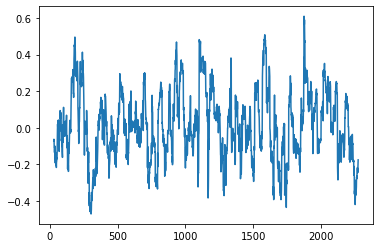

In [24]:
plt.plot(df_analysis_correl['rolling_correl'])

### Building models for Sentiment Analysis

In [25]:
df_tweet['sentiment'] = 0
df_tweet.loc[df_tweet.comp_sentiment>=0.3,'sentiment'] = 1
df_tweet.loc[df_tweet.comp_sentiment<=-0.3,'sentiment'] = -1

#### For the models, the dependent column is the sentiment (the ground truth carrying forward from the vader library), we will use the final cleansed_tweet_lower as the independent variable, as an extension of this can be to predict sentiment 

In [ ]:
df_tweet_model = df_tweet[['cleansed_tweet_lower','sentiment','comp_sentiment']]

In [ ]:
df_tweet_model_trim = df_tweet_model.sample(frac = 0.1)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn import svm
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

#### Naive Bayes Model

In [ ]:
# Split into training and testing data
x = df_tweet_model_trim['cleansed_tweet_lower']
y = df_tweet_model_trim['sentiment']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [ ]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [ ]:
model = MultinomialNB()
model.fit(x, y)
model.score(x_test, y_test)

0.8125080261975086

<AxesSubplot:>

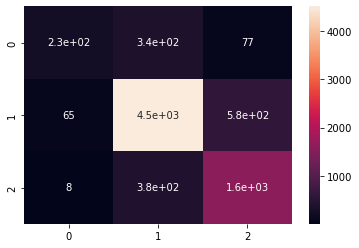

In [ ]:
cf_matrix = confusion_matrix(y_test, model.predict(x_test))
sb.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

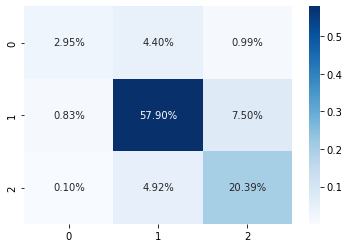

In [ ]:
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

#### Support Vector Classifier

In [ ]:
# Split into training and testing data
x = df_tweet_model_trim['cleansed_tweet_lower']
y = df_tweet_model_trim['sentiment']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(x)
test_vectors = vectorizer.transform(x_test)

In [ ]:
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, y)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear, output_dict=True)

Training time: 50.110765s; Prediction time: 9.339140s


In [ ]:
print(classification_report(y_test, prediction_linear))

              precision    recall  f1-score   support

          -1       0.88      0.67      0.76       650
           0       0.92      0.97      0.95      5158
           1       0.94      0.88      0.91      1979

    accuracy                           0.92      7787
   macro avg       0.91      0.84      0.87      7787
weighted avg       0.92      0.92      0.92      7787



<AxesSubplot:>

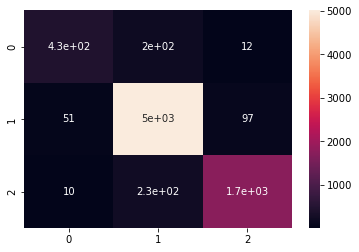

In [ ]:
cf_matrix = confusion_matrix(y_test, prediction_linear)
sb.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

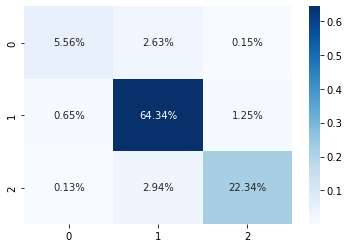

In [ ]:
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

#### LSTM

In [15]:
lb=LabelEncoder()
df_tweet_model_trim['sentiment_trans'] = lb.fit_transform(df_tweet_model_trim['sentiment'])

In [ ]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df_tweet_model_trim['cleansed_tweet_lower'].values)
X = tokenizer.texts_to_sequences(df_tweet_model_trim['cleansed_tweet_lower'].values)
X = pad_sequences(X)

In [ ]:
#Splitting the data into training and testing
y=pd.get_dummies(df_tweet_model_trim['sentiment_trans'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 41, 120)           60000     
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 41, 120)          0         
 lDropout1D)                                                     
                                                                 
 lstm_7 (LSTM)               (None, 176)               209088    
                                                                 
 dense_7 (Dense)             (None, 3)                 531       
                                                                 
Total params: 269,619
Trainable params: 269,619
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size=32
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=5,
    validation_data=(X_test, y_test),
)

Epoch 1/5
341/341 [==============================] - 41s 117ms/step - loss: 0.6007 - accuracy: 0.7841 - val_loss: 0.5152 - val_accuracy: 0.8314
Epoch 2/5
341/341 [==============================] - 46s 134ms/step - loss: 0.4665 - accuracy: 0.8488 - val_loss: 0.4822 - val_accuracy: 0.8453
Epoch 3/5
341/341 [==============================] - 46s 135ms/step - loss: 0.4428 - accuracy: 0.8570 - val_loss: 0.4739 - val_accuracy: 0.8506
Epoch 4/5
341/341 [==============================] - 45s 133ms/step - loss: 0.4324 - accuracy: 0.8594 - val_loss: 0.4728 - val_accuracy: 0.8509
Epoch 5/5
341/341 [==============================] - 44s 129ms/step - loss: 0.4234 - accuracy: 0.8613 - val_loss: 0.4669 - val_accuracy: 0.8477


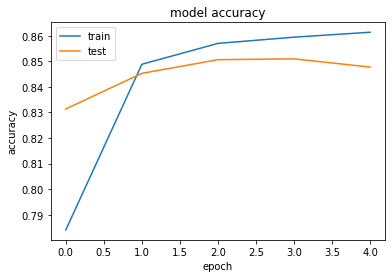

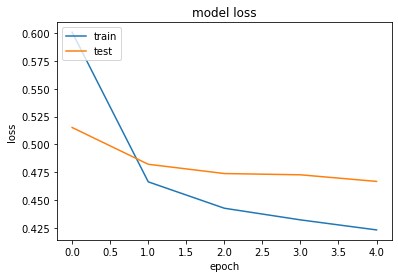

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<AxesSubplot:>

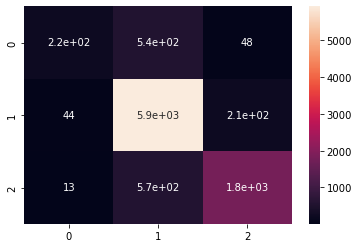

In [ ]:
cf_matrix = confusion_matrix(y_test.idxmax(axis=1), model.predict(X_test).argmax(axis=1))
sb.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

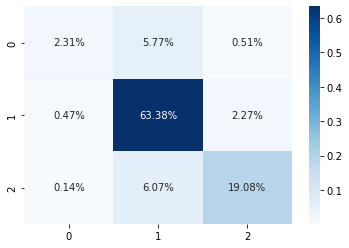

In [ ]:
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### Bert

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
df_tweet_model = pd.read_csv("gdrive/MyDrive/Bitcoin Price Prediction/Data_fro_modelling.csv")

In [16]:
df_tweet_model_trim = df_tweet_model.sample(frac=0.1)
df_tweet_model_trim = df_tweet_model_trim.dropna()
df_tweet_model_trim['sentiment_trans'] = lb.fit_transform(df_tweet_model_trim['sentiment'])

In [ ]:
df_train,df_test = train_test_split(df_tweet_model_trim,test_size=0.3,random_state=42)

In [43]:
from tensorflow.keras.utils import to_categorical

In [63]:
y_train = to_categorical(df_train.sentiment_trans)
y_test = to_categorical(df_test.sentiment_trans)

In [45]:
!pip install transformers
import transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
from transformers import AutoTokenizer,TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [65]:
df_test = df_test.dropna()
df_train = df_train.dropna()

In [66]:
# Tokenize the input (takes some time) 
# here tokenizer using from bert-base-cased
x_train = tokenizer(
    text=df_train.cleansed_tweet_lower.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)


x_test = tokenizer(
    text=df_test.cleansed_tweet_lower.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [67]:
input_ids = x_train['input_ids']
attention_mask = x_train['attention_mask']

In [68]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

In [70]:
max_len = 70
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
embeddings = bert(input_ids,attention_mask = input_mask)[0] 
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)
y = Dense(3,activation = 'sigmoid')(out)
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

In [71]:
optimizer = Adam(
    learning_rate=5e-05, # this learning rate is for bert model , taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)
# Set loss and metrics
loss =CategoricalCrossentropy(from_logits = True)
metric = CategoricalAccuracy('balanced_accuracy'),
# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

In [72]:
train_history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train,
    validation_data = (
    {'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']}, y_test
    ),
  epochs=1,
    batch_size=36
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


606/606 [==============================] - 384s 598ms/step - loss: 0.3793 - balanced_accuracy: 0.8607 - val_loss: 0.1885 - val_balanced_accuracy: 0.9361


In [73]:
predicted_raw = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})
predicted_raw[0]

array([0.27912387, 0.9962276 , 0.46777123], dtype=float32)

In [74]:
y_predicted = np.argmax(predicted_raw, axis = 1)
y_true = df_test.sentiment_trans

In [79]:
import seaborn as sb

In [82]:
print(classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       775
           1       0.94      0.96      0.95      6261
           2       0.95      0.89      0.92      2302

    accuracy                           0.94      9338
   macro avg       0.91      0.90      0.90      9338
weighted avg       0.94      0.94      0.94      9338



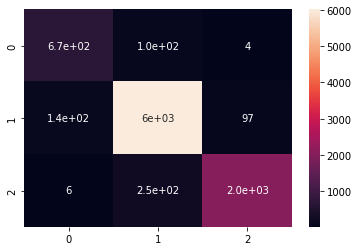

In [80]:
cf_matrix = confusion_matrix(y_true, y_predicted)
sb.heatmap(cf_matrix, annot=True)

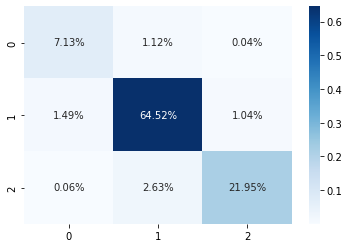

In [81]:
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

#### Roberta

In [17]:
import torch
import transformers
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaModel, RobertaTokenizer
from tqdm import tqdm

In [18]:

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

##### Fraction taken as 1% to reduce training time

In [29]:
df_tweet_model_trim = df_tweet_model.sample(frac=0.01)
df_tweet_model_trim = df_tweet_model_trim.dropna()
df_tweet_model_trim['sentiment_trans'] = lb.fit_transform(df_tweet_model_trim['sentiment'])

In [30]:
MAX_LEN = 256
TRAIN_BATCH_SIZE = 4
VALID_BATCH_SIZE = 2
# EPOCHS = 1
LEARNING_RATE = 1e-05
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', truncation=True, do_lower_case=True)

In [31]:
class SentimentData(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.cleansed_tweet_lower
        self.targets = self.data.sentiment_trans
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [32]:
train_size = 0.8
train_data=df_tweet_model_trim.sample(frac=train_size,random_state=200)
test_data=df_tweet_model_trim.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)


print("FULL Dataset: {}".format(df_tweet_model_trim.shape))
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(test_data.shape))

training_set = SentimentData(train_data, tokenizer, MAX_LEN)
testing_set = SentimentData(test_data, tokenizer, MAX_LEN)

FULL Dataset: (3112, 5)
TRAIN Dataset: (2490, 5)
TEST Dataset: (622, 5)


In [33]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [34]:
class RobertaClass(torch.nn.Module):
    def __init__(self):
        super(RobertaClass, self).__init__()
        self.l1 = RobertaModel.from_pretrained("roberta-base")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, 5)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

In [35]:
model = RobertaClass()
model.to(device)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RobertaClass(
  (l1): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), e

In [36]:
# Creating the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [37]:
def calcuate_accuracy(preds, targets):
    n_correct = (preds==targets).sum().item()
    return n_correct

In [38]:
# Defining the training function on the 80% of the dataset for tuning the distilbert model

def train(epoch):
    tr_loss = 0
    n_correct = 0
    nb_tr_steps = 0
    nb_tr_examples = 0
    model.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.long)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_function(outputs, targets)
        tr_loss += loss.item()
        big_val, big_idx = torch.max(outputs.data, dim=1)
        n_correct += calcuate_accuracy(big_idx, targets)

        nb_tr_steps += 1
        nb_tr_examples+=targets.size(0)
        
        if _%5000==0:
            loss_step = tr_loss/nb_tr_steps
            accu_step = (n_correct*100)/nb_tr_examples 
            print(f"Training Loss per 5000 steps: {loss_step}")
            print(f"Training Accuracy per 5000 steps: {accu_step}")

        optimizer.zero_grad()
        loss.backward()
        # # When using GPU
        optimizer.step()

    print(f'The Total Accuracy for Epoch {epoch}: {(n_correct*100)/nb_tr_examples}')
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Training Loss Epoch: {epoch_loss}")
    print(f"Training Accuracy Epoch: {epoch_accu}")

    return 

In [39]:
EPOCHS = 1
for epoch in range(EPOCHS):
    train(epoch)

0it [00:00, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
1it [00:00,  3.89it/s]

Training Loss per 5000 steps: 1.773547649383545
Training Accuracy per 5000 steps: 0.0


623it [02:13,  4.67it/s]

The Total Accuracy for Epoch 0: 72.16867469879519
Training Loss Epoch: 0.7422488547419086
Training Accuracy Epoch: 72.16867469879519


In [41]:
def valid(model, testing_loader):
    model.eval()
    n_correct = 0; n_wrong = 0; total = 0; tr_loss=0; nb_tr_steps=0; nb_tr_examples=0
    with torch.no_grad():
        for _, data in tqdm(enumerate(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            outputs = model(ids, mask, token_type_ids).squeeze()
            loss = loss_function(outputs, targets)
            tr_loss += loss.item()
            big_val, big_idx = torch.max(outputs.data, dim=1)
            n_correct += calcuate_accuracy(big_idx, targets)

            nb_tr_steps += 1
            nb_tr_examples+=targets.size(0)
            
            if _%5000==0:
                loss_step = tr_loss/nb_tr_steps
                accu_step = (n_correct*100)/nb_tr_examples
                print(f"Validation Loss per 100 steps: {loss_step}")
                print(f"Validation Accuracy per 100 steps: {accu_step}")
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Validation Loss Epoch: {epoch_loss}")
    print(f"Validation Accuracy Epoch: {epoch_accu}")
    
    return epoch_accu


In [42]:
acc = valid(model, testing_loader)
print("Accuracy on test data = %0.2f%%" % acc)

5it [00:00, 22.59it/s]

Validation Loss per 100 steps: 2.9814844131469727
Validation Accuracy per 100 steps: 0.0


311it [00:10, 30.10it/s]

Validation Loss Epoch: 0.52482456621681
Validation Accuracy Epoch: 79.7427652733119
Accuracy on test data = 79.74%
